# Required Library

In [1]:
## importing required library
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
import datetime as dt
%matplotlib inline

In [2]:
#Using yfin.pdr_override() to override pandas_datareader's default behavior
yfin.pdr_override()

In [3]:
# Define the start and end dates for data retrieval
start = dt.datetime(2017,1,1)
end = dt.datetime(2023,8,23)

# Use pandas_datareader to get historical stock data for AAPL within the specified date range
df = pdr.get_data_yahoo('AAPL',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display the first few rows of the DataFrame to inspect the initial data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059309,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029018,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166470,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469334,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720934,134247600


In [5]:
# Display the last few rows of the DataFrame to inspect the most recent data
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900
2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900
2023-08-22,177.059998,177.679993,176.250000,177.229996,177.229996,42084200


In [6]:
# Reset the index of the DataFrame to default integer index
df = df.reset_index()

# Display the first few rows of the modified DataFrame after resetting the index
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059309,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029018,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166470,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469334,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720934,134247600


In [7]:
# Remove the 'Date' and 'Adj Close' columns from the DataFrame
df.drop(['Date','Adj Close'],axis = 1,inplace = True)

# Display the first few rows of the DataFrame after dropping the specified columns
df.head()

,Open,High,Low,Close,Volume
0,28.950001,29.082500,28.690001,29.037500,115127600
1,28.962500,29.127501,28.937500,29.004999,84472400
2,28.980000,29.215000,28.952499,29.152500,88774400
3,29.195000,29.540001,29.117500,29.477501,127007600
4,29.487499,29.857500,29.485001,29.747499,134247600


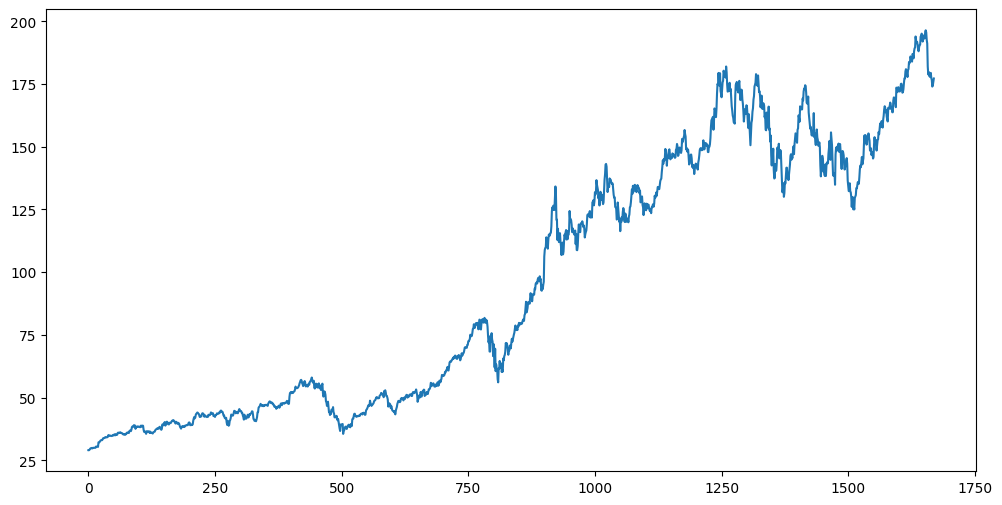

In [8]:
# Plot the 'Close' column from the DataFrame using matplotlib
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.show()

In [9]:
# Get the dimensions (rows and columns) of the DataFrame
df.shape

(1670, 5)

In [10]:
# Calculate the rolling mean of the 'Close' column with a window size of 100
rolling_100 = df.Close.rolling(100).mean()

# The rolling_100 variable now contains the moving average of the 'Close' prices with a window of 100 days
rolling_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1665    178.033900
1666    178.171400
1667    178.333501
1668    178.515401
1669    178.680000
Name: Close, Length: 1670, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

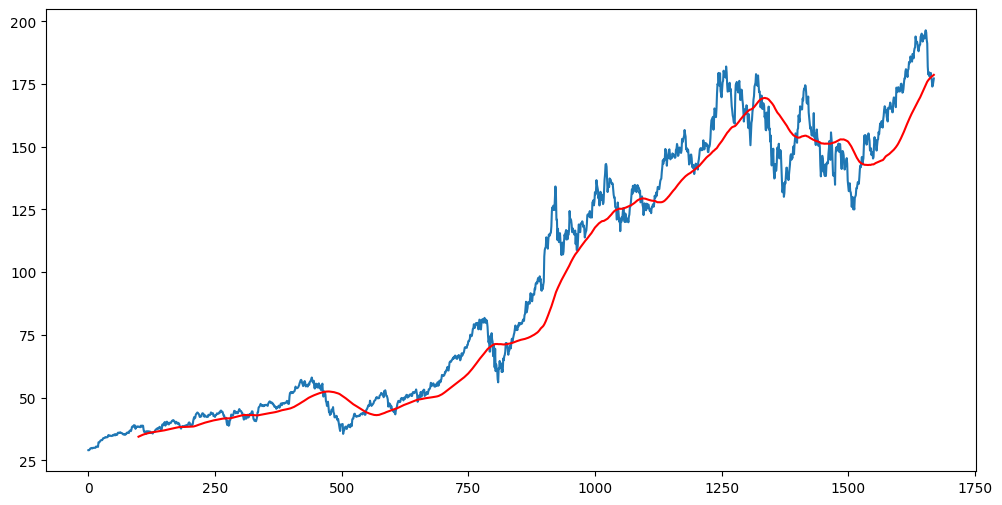

In [11]:
## Plotting the graph of rolling_100 with respected to actual values

plt.figure(figsize=(12,6))     # Create a figure with a custom size (12x6 inches) using matplotlib
plt.plot(df.Close)             # Plot the 'Close' column from the DataFrame in blue
plt.plot(rolling_100,'r')      # Plot the rolling_100 data in red to visualize the rolling mean
plt.show                       # Display the plotted graphs

In [12]:
# Calculate the rolling mean of the 'Close' column with a window size of 200
rolling_200 = df.Close.rolling(200).mean()

# The rolling_100 variable now contains the moving average of the 'Close' prices with a window of 200 days
rolling_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1665    161.27275
1666    161.36405
1667    161.46980
1668    161.59575
1669    161.75675
Name: Close, Length: 1670, dtype: float64

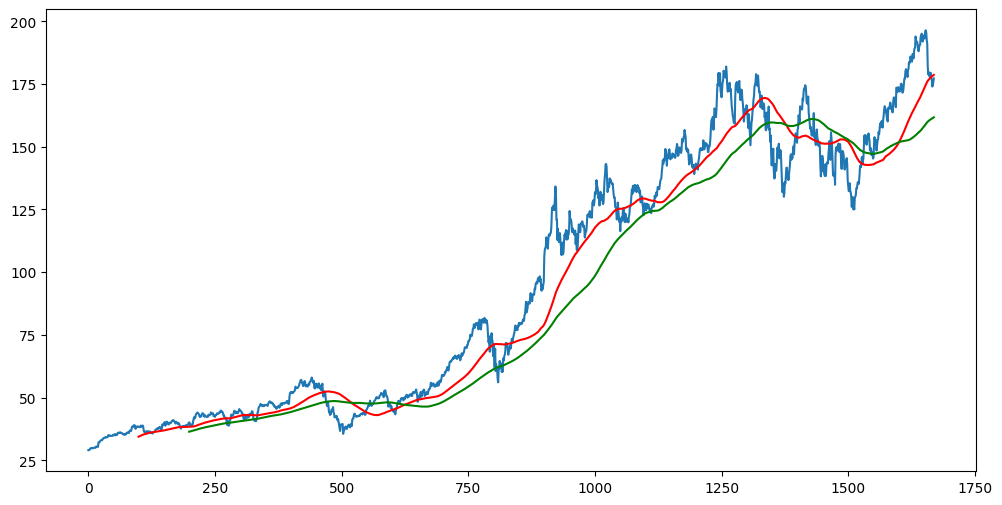

In [13]:
## Plotting the graph of rolling_100,rolling_200 with respected to actual values

plt.figure(figsize=(12,6))        # Create a figure with a custom size (12x6 inches) using matplotlib
plt.plot(df.Close)                # Plot the 'Close' column from the DataFrame in blue
plt.plot(rolling_100,'r')         # Plot the rolling_100 data in red to visualize the rolling mean
plt.plot(rolling_200,'g')         # Plot the rolling_200 data in red to visualize the rolling mean
plt.show()                        # Display the plotted graphs

In [14]:
## Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1169, 1)
(501, 1)


In [15]:
# Split the dataset into training and testing subsets
# Display the first few rows of the training dataset and testing dataset
data_training.head(),data_testing.head()

(       Close
 0  29.037500
 1  29.004999
 2  29.152500
 3  29.477501
 4  29.747499,
            Close
 1169  148.360001
 1170  147.539993
 1171  148.600006
 1172  153.119995
 1173  151.830002)

In [16]:
# Import the MinMaxScaler class from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler with a feature range of (0, 1)
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
# Use the previously created 'scaler' instance to transform the training dataset
# and scale its features to the specified range
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[2.66152576e-04],
       [0.00000000e+00],
       [1.20788598e-03],
       ...,
       [9.76006283e-01],
       [9.88453602e-01],
       [9.87716496e-01]])

In [18]:
# Initialize empty lists to store training data and labels
x_train = []
y_train = []

# Create training data and labels by iterating through the data_training_array
# and forming sequences of length 100 for input (x_train) and the corresponding value for output (y_train)
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

    # Convert the training data and labels lists into numpy arrays
x_train,y_train = np.array(x_train) , np.array(y_train)

In [19]:
# The shape of x_train indicates the number of samples, time steps, and features in the training data
# It has a shape (number_of_samples, time_steps, number_of_features)
x_train.shape

(1069, 100, 1)

In [20]:
# Import the necessary layers and model class from the Keras library
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
# Create a Sequential model for building a neural network
model = Sequential()

# Add an LSTM layer with 50 units, ReLU activation, and return sequences for the first input layer
# The input shape corresponds to the shape of one sequence in x_train
model.add(LSTM(units = 50 , activation = 'relu',return_sequences = True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))    # Apply a dropout layer to prevent overfitting

# Add another LSTM layer with 60 units and ReLU activation, also returning sequences
model.add(LSTM(units = 60 , activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

# Add another LSTM layer with 80 units and ReLU activation, still returning sequences
model.add(LSTM(units = 80 , activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

# Add an LSTM layer with 120 units and ReLU activation (no return_sequences as it's the final layer)
model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

# Add a Dense layer with 1 unit for output prediction
model.add(Dense(units=1))

In [22]:
# Display a summary of the model's architecture, including layer names, output shapes, and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam',loss = 'mean_squared_error')

# Train the model using the training data (x_train) and labels (y_train) for 50 epochs
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
34/34 [==============================] - 16s 252ms/step - loss: 0.0627
Epoch 2/50
34/34 [==============================] - 9s 254ms/step - loss: 0.0118
Epoch 3/50
34/34 [==============================] - 8s 243ms/step - loss: 0.0097
Epoch 4/50
34/34 [==============================] - 8s 250ms/step - loss: 0.0083
Epoch 5/50
34/34 [==============================] - 8s 238ms/step - loss: 0.0068
Epoch 6/50
34/34 [==============================] - 8s 244ms/step - loss: 0.0101
Epoch 7/50
34/34 [==============================] - 8s 239ms/step - loss: 0.0084
Epoch 8/50
34/34 [==============================] - 8s 234ms/step - loss: 0.0064
Epoch 9/50
34/34 [==============================] - 8s 249ms/step - loss: 0.0070
Epoch 10/50
34/34 [==============================] - 8s 244ms/step - loss: 0.0065
Epoch 11/50
34/34 [==============================] - 8s 243ms/step - loss: 0.0061
Epoch 12/50
34/34 [==============================] - 8s 239ms/step - loss: 0.0063
Epoch 13/50
34/34 [=====

In [24]:
# Save the trained Keras model to a file named 'keras_model.h5'
model.save('keras_model.h52')

INFO:tensorflow:Assets written to: keras_model.h52\assets


INFO:tensorflow:Assets written to: keras_model.h52\assets


In [25]:
# Display the first few rows of the testing dataset
data_testing.head()

,Close
1169,148.360001
1170,147.539993
1171,148.600006
1172,153.119995
1173,151.830002


In [26]:
# Extract the most recent 100 days' data from the training dataset
past_100_days = data_training.tail(100)

In [27]:
# Append the most recent 100 days' data from training and the testing dataset together
# The ignore_index=True argument resets the index of the combined DataFrame

final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\Jaiku\AppData\Local\Temp\ipykernel_12944\2954462725.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [28]:
# Display the first few rows of the combined DataFrame containing the most recent 100 days' data from training and testing
final_df.head()

,Close
0,125.900002
1,126.209999
2,127.900002
3,130.360001
4,133.000000


In [29]:
# Use the 'scaler' instance to transform and scale the combined data in final_df
input_data = scaler.fit_transform(final_df)

In [30]:
# The shape of input_data indicates the number of samples, time steps, and features in the input data
# It has a shape (number_of_samples, time_steps, number_of_features)
input_data.shape

(601, 1)

In [31]:
# Initialize empty lists to store testing data and labels
x_test = []
y_test = []

# Create testing data and labels by iterating through the input_data
# and forming sequences of length 100 for input (x_test) and the corresponding value for output (y_test)
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
# Convert the testing data and labels lists into numpy arrays
x_test , y_test = np.array(x_test) , np.array(y_test)

# Print the shapes of the testing data and labels arrays
print(x_test.shape)
print(y_test.shape)

(501, 100, 1)
(501,)


In [33]:
# Use the trained model to predict values based on the testing input data (x_test)
y_predicted = model.predict(x_test)

16/16 [==============================] - 2s 75ms/step


In [34]:
# The shape of y_predicted indicates the number of predicted values and the number of features in each prediction
# It has a shape (number_of_predictions, number_of_features)
y_predicted.shape

(501, 1)

In [35]:
# Retrieve the scaling factors used by the scaler to transform the data
scaler=scaler.scale_

In [36]:
# Calculate the inverse of the scaling factor to revert the scaled predictions and test labels
scale_factor = 1/scaler
# Rescale the predicted values and test labels to their original scale
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

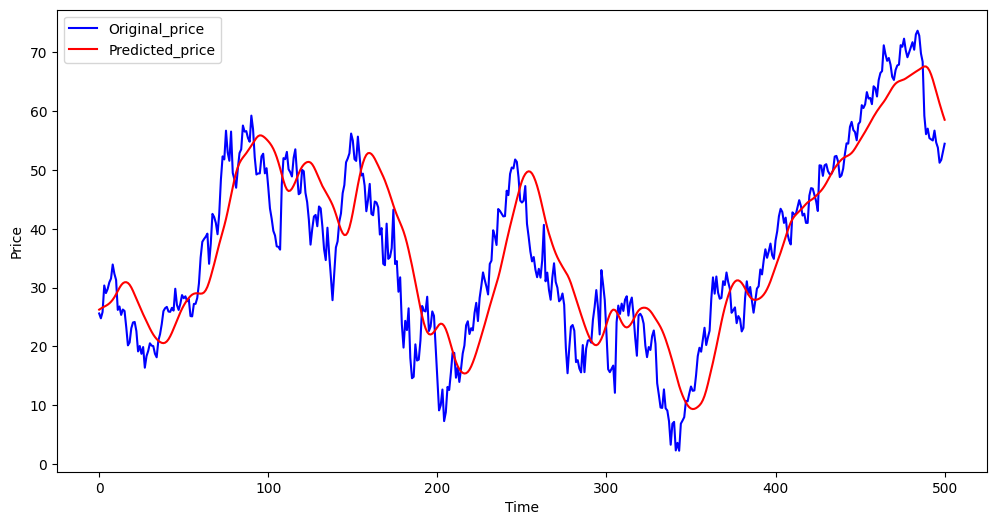

In [37]:
plt.figure(figsize=(12,6))                   # Create a figure with a custom size (12x6 inches) using matplotlib    
plt.plot(y_test,'b',label='Original_price')  # Plot the original test prices in blue and the predicted prices in red
plt.plot(y_predicted,'r',label ='Predicted_price')
plt.xlabel('Time')                           # Add labels to the x and y axes
plt.ylabel('Price')
plt.legend()                                 # Display a legend to differentiate between original and predicted prices
plt.show()                                   # Show the plotted graph

#  Price Forecast for the Next 30 Days

In [38]:
# Import the MinMaxScaler class from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler with a feature range of (0, 1)
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
# Use the 'scaler' instance to transform and scale the testing data in 'data_testing'
# Reshape the data to be a single column (-1 indicates to adjust the dimension automatically)
data_input = scaler.fit_transform(np.array(data_testing).reshape(-1,1))

In [40]:
# The length of data_input indicates the number of data points in the scaled testing input
len(data_input)

501

In [41]:
# Extract a portion of the scaled testing input data starting from index 401 and reshape it
# into a format with one sample and multiple features
x_input = data_input[401:].reshape(1,-1)
# The shape of x_input indicates one sample with multiple features
x_input.shape

(1, 100)

In [42]:
# Convert the reshaped x_input into a list
temp_input = list(x_input)
# Convert the list back to a nested list structure (from [[value1, value2, ...]] to [value1, value2, ...])
temp_input = temp_input[0].tolist()

In [43]:
# The 'temp_input' list represents a sequence of input data points used for generating future predictions
temp_input

[0.5227495983165986,
 0.5583087929866393,
 0.5760884971310465,
 0.5685287423525813,
 0.5423491207931921,
 0.5549489969156656,
 0.5181296651002358,
 0.5009100693801734,
 0.49111030814187684,
 0.5675486594193648,
 0.5626488856096032,
 0.562928726203002,
 0.5802884558385375,
 0.5965281822441573,
 0.5828083028917681,
 0.5599889046409001,
 0.5643287836450903,
 0.542489254708665,
 0.5423491207931921,
 0.6074479467123699,
 0.6252274372380033,
 0.623967513711388,
 0.6092677650445562,
 0.5940081215721529,
 0.5707685351936398,
 0.6796865529011407,
 0.6787064699679242,
 0.6544870142749679,
 0.6795464189856677,
 0.6822063999543713,
 0.6656868329553527,
 0.6586869729824589,
 0.6586869729824589,
 0.6673667309908398,
 0.7004060786076498,
 0.7019460563464377,
 0.6885062312062207,
 0.6515469790940918,
 0.6554668835894106,
 0.6715666896983308,
 0.7057258269262832,
 0.7319054484856724,
 0.7312054197646285,
 0.7709645731421602,
 0.7830043408402889,
 0.7638247928725668,
 0.758644964850633,
 0.7391853626707

In [44]:
## Demonstrate prediction for next 30 days

from numpy import array
# Initialize an empty list to store the predicted outputs
lst_output = []
# Set the number of time steps (n_steps) for the LSTM model
n_steps = 100
# Initialize a loop counter
i = 0
# Loop to generate predictions for the next 30 days
while(i<30):
    # If the input sequence has more than 100 points
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

# Print the list of predicted outputs for the next 30 days       
print(lst_output)

[0.7787446]
101
1 day input [0.55830879 0.5760885  0.56852874 0.54234912 0.554949   0.51812967
 0.50091007 0.49111031 0.56754866 0.56264889 0.56292873 0.58028846
 0.59652818 0.5828083  0.5599889  0.56432878 0.54248925 0.54234912
 0.60744795 0.62522744 0.62396751 0.60926777 0.59400812 0.57076854
 0.67968655 0.67870647 0.65448701 0.67954642 0.6822064  0.66568683
 0.65868697 0.65868697 0.66736673 0.70040608 0.70194606 0.68850623
 0.65154698 0.65546688 0.67156669 0.70572583 0.73190545 0.73120542
 0.77096457 0.78300434 0.76382479 0.75864496 0.73918536 0.77768459
 0.78314447 0.82276349 0.81604369 0.8250035  0.85384289 0.83858325
 0.83984317 0.82514363 0.86770269 0.86322268 0.84348323 0.88254236
 0.89920206 0.90396191 0.96528075 0.94414125 0.9283215  0.93504131
 0.91922156 0.89024225 0.88282241 0.90648197 0.9172616  0.91936169
 0.96556081 0.96192074 0.98110051 0.95352104 0.93686134 0.94820108
 0.96038077 0.97270059 0.95478096 0.99132024 1.         0.98824029
 0.94582115 0.9260815  0.79756417 

9 day output [[0.76369345]]
10 day input [0.56264889 0.56292873 0.58028846 0.59652818 0.5828083  0.5599889
 0.56432878 0.54248925 0.54234912 0.60744795 0.62522744 0.62396751
 0.60926777 0.59400812 0.57076854 0.67968655 0.67870647 0.65448701
 0.67954642 0.6822064  0.66568683 0.65868697 0.65868697 0.66736673
 0.70040608 0.70194606 0.68850623 0.65154698 0.65546688 0.67156669
 0.70572583 0.73190545 0.73120542 0.77096457 0.78300434 0.76382479
 0.75864496 0.73918536 0.77768459 0.78314447 0.82276349 0.81604369
 0.8250035  0.85384289 0.83858325 0.83984317 0.82514363 0.86770269
 0.86322268 0.84348323 0.88254236 0.89920206 0.90396191 0.96528075
 0.94414125 0.9283215  0.93504131 0.91922156 0.89024225 0.88282241
 0.90648197 0.9172616  0.91936169 0.96556081 0.96192074 0.98110051
 0.95352104 0.93686134 0.94820108 0.96038077 0.97270059 0.95478096
 0.99132024 1.         0.98824029 0.94582115 0.9260815  0.79756417
 0.75360506 0.76690475 0.74436519 0.74128524 0.73876517 0.76214489
 0.73400532 0.72168571

18 day output [[0.7799053]]
19 day input [0.60744795 0.62522744 0.62396751 0.60926777 0.59400812 0.57076854
 0.67968655 0.67870647 0.65448701 0.67954642 0.6822064  0.66568683
 0.65868697 0.65868697 0.66736673 0.70040608 0.70194606 0.68850623
 0.65154698 0.65546688 0.67156669 0.70572583 0.73190545 0.73120542
 0.77096457 0.78300434 0.76382479 0.75864496 0.73918536 0.77768459
 0.78314447 0.82276349 0.81604369 0.8250035  0.85384289 0.83858325
 0.83984317 0.82514363 0.86770269 0.86322268 0.84348323 0.88254236
 0.89920206 0.90396191 0.96528075 0.94414125 0.9283215  0.93504131
 0.91922156 0.89024225 0.88282241 0.90648197 0.9172616  0.91936169
 0.96556081 0.96192074 0.98110051 0.95352104 0.93686134 0.94820108
 0.96038077 0.97270059 0.95478096 0.99132024 1.         0.98824029
 0.94582115 0.9260815  0.79756417 0.75360506 0.76690475 0.74436519
 0.74128524 0.73876517 0.76214489 0.73400532 0.72168571 0.68570633
 0.69256627 0.71146576 0.73092537 0.77874458 0.76990628 0.76342499
 0.75930452 0.7572751

26 day output [[0.78972363]]
27 day input [0.65448701 0.67954642 0.6822064  0.66568683 0.65868697 0.65868697
 0.66736673 0.70040608 0.70194606 0.68850623 0.65154698 0.65546688
 0.67156669 0.70572583 0.73190545 0.73120542 0.77096457 0.78300434
 0.76382479 0.75864496 0.73918536 0.77768459 0.78314447 0.82276349
 0.81604369 0.8250035  0.85384289 0.83858325 0.83984317 0.82514363
 0.86770269 0.86322268 0.84348323 0.88254236 0.89920206 0.90396191
 0.96528075 0.94414125 0.9283215  0.93504131 0.91922156 0.89024225
 0.88282241 0.90648197 0.9172616  0.91936169 0.96556081 0.96192074
 0.98110051 0.95352104 0.93686134 0.94820108 0.96038077 0.97270059
 0.95478096 0.99132024 1.         0.98824029 0.94582115 0.9260815
 0.79756417 0.75360506 0.76690475 0.74436519 0.74128524 0.73876517
 0.76214489 0.73400532 0.72168571 0.68570633 0.69256627 0.71146576
 0.73092537 0.77874458 0.76990628 0.76342499 0.75930452 0.7572751
 0.75691545 0.75776291 0.75939131 0.76145291 0.76369345 0.76594508
 0.76811087 0.77014673

In [45]:
# Generate an array representing the days for which predictions were made (1 to 100)
day_new = np.arange(1,101)
# Generate an array representing the days for which future predictions are being made (101 to 130)
day_pred = np.arange(101,131)

In [46]:
# The length of df['Close'] indicates the total number of data points in the 'Close' column of the DataFrame
len(df['Close'])

1670

In [47]:
# Use the 'scaler' instance to transform and scale the 'Close' prices from the DataFrame
# Reshape the data to be a single column (-1 indicates to adjust the dimension automatically)
df1 = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

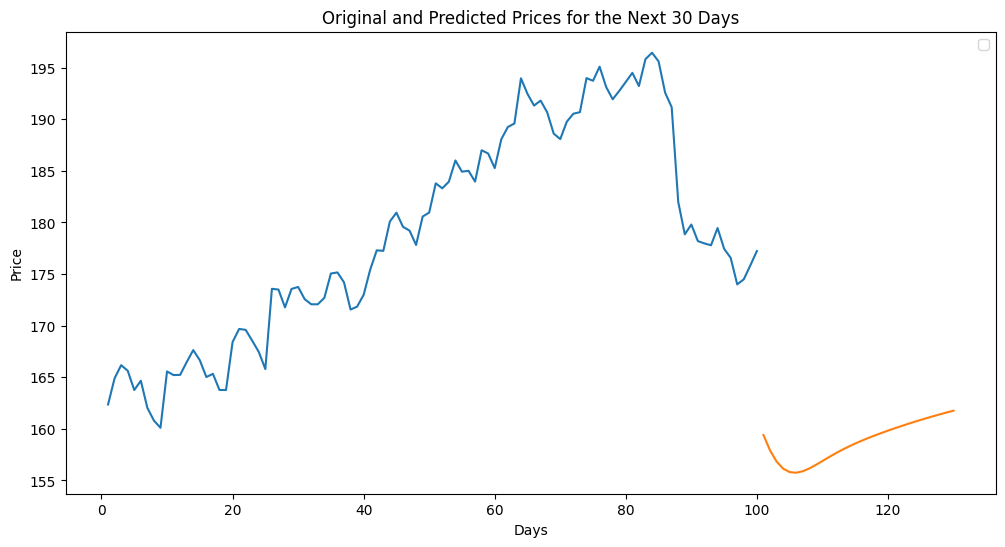

In [48]:
# Plot the original 'Close' prices for the known days and the predicted prices for the forecasted days
plt.figure(figsize=(12,6))
plt.plot(day_new,scaler.inverse_transform(df1[1570:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# Add a title to the plot
plt.title('Original and Predicted Prices for the Next 30 Days')
# Add labels to the x and y axes
plt.xlabel('Days')
plt.ylabel('Price')
# Display a legend to differentiate between original and predicted prices
plt.legend()
plt.show()

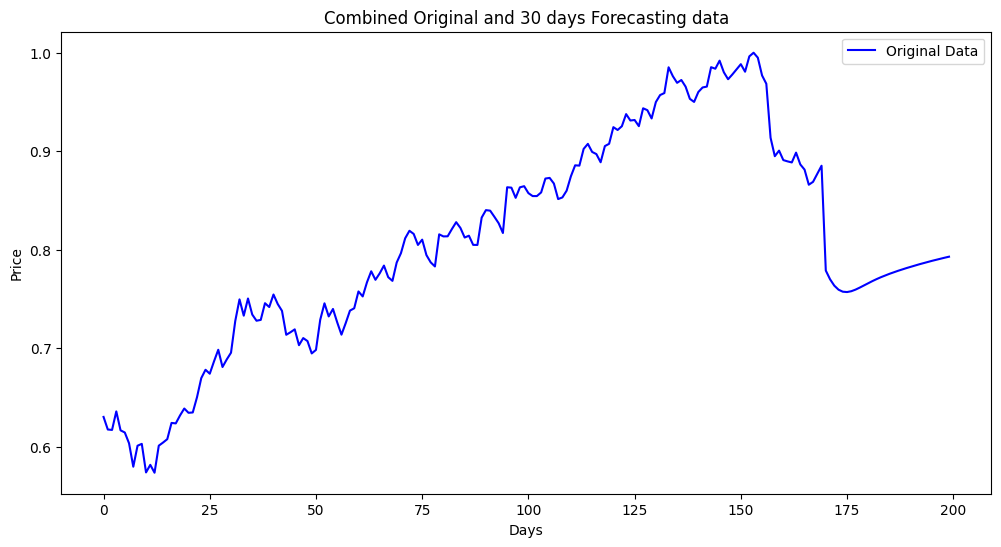

In [49]:
# Convert the scaled 'Close' prices (df1) to a list and extend it with the predicted values (lst_output)
plt.figure(figsize=(12,6))
df3 = df1.tolist()
df3.extend(lst_output)

# Plot the combined data starting from index 1500
plt.plot(df3[1500:], color='blue', label='Original Data')


# Add a title to the plot
plt.title('Combined Original and 30 days Forecasting data')

# Add labels to the x and y axes
plt.xlabel('Days')
plt.ylabel('Price')

# Display a legend to differentiate between the original and extended data
plt.legend()

# Show the plotted graph
plt.show()


In [50]:
# Inverse-transform the combined data (df3) to revert the scaled values back to their original scale
df3 = scaler.inverse_transform(df3).tolist()

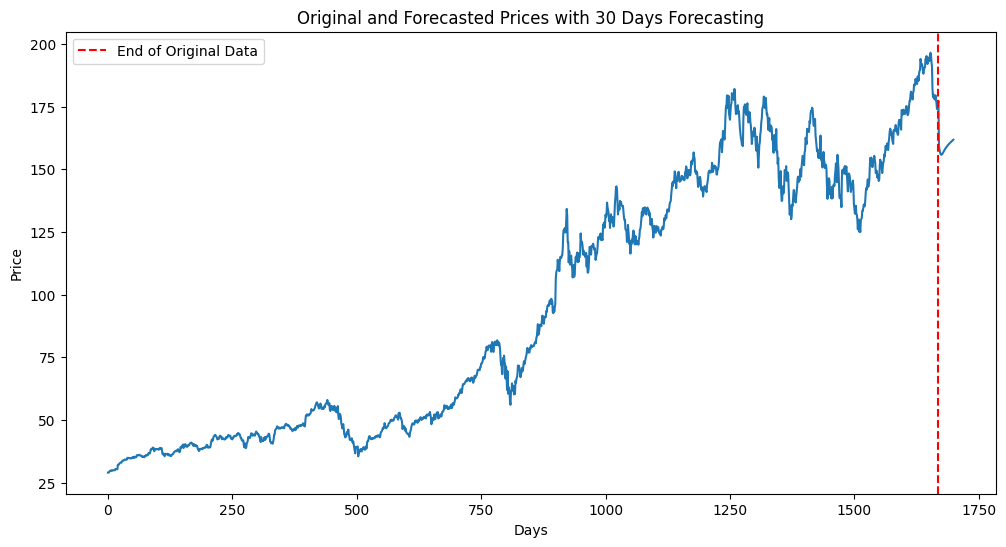

In [51]:
# Plot the combined data (original 'Close' prices and 30 days of forecasted prices)
plt.figure(figsize=(12,6))
plt.plot(df3)

# Add a vertical line to indicate the point where original data ends and forecasting begins
plt.axvline(x=len(df['Close']) - 1, color='red', linestyle='--', label='End of Original Data')

# Add a title to the plot
plt.title('Original and Forecasted Prices with 30 Days Forecasting')

# Add labels to the x and y axes
plt.xlabel('Days')
plt.ylabel('Price')

# Display a legend to differentiate between original and forecasted data
plt.legend()

# Show the plotted graph
plt.show()